## File Import: "evolutionary game theory"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', None)

path = "C:/Users/kleinow/ownCloud/!PROJECT EVOLGATH/Evolgath/updated_sql_search"

In [2]:
# items
evolgath = pd.read_csv(path + '/evolgath.csv')
evolgath_items_ab = pd.read_csv(path + '/evolgath_items_ab.csv')
evolgath_titles = pd.read_csv(path + '/evolgath_titles.csv')
# abstracts
evolgath_kw_abstracts = pd.read_csv(path + '/evolgath_kw_abstracts.csv')
evolgath_abstract = pd.read_csv(path + '/evolgath_abstract.csv')
evolgath_titles_abstracts = pd.read_csv(path + '/evolgath_titles_abstracts.csv')

# Add additional columns to data frames
evolgath = evolgath.assign(found_in='keywords')
evolgath_items_ab = evolgath_items_ab.assign(found_in='abstract')
evolgath_titles = evolgath_titles.assign(found_in='title')

evolgath = evolgath.merge(evolgath_kw_abstracts, on='item_id', how='left')
evolgath_items_ab = evolgath_items_ab.merge(evolgath_abstract, on='item_id', how='left')
evolgath_titles = evolgath_titles.merge(evolgath_titles_abstracts, on='item_id', how='left')

evolgath_df = pd.concat([evolgath, evolgath_items_ab, evolgath_titles], ignore_index=True)

evolgath_df.head()
evolgath_df.shape

(3464, 52)

## File Import: "emergence of cooperation" and "evolution of cooperation"

In [3]:
# items
emcoop = pd.read_csv(path + '/emcoop.csv')
emcoop_items_ab = pd.read_csv(path + '/emcoop_items_ab.csv')
emcoop_titles = pd.read_csv(path + '/emcoop_titles.csv')
# abstracts
emcoop_kw_abstracts = pd.read_csv(path + '/emcoop_kw_abstracts.csv')
emcoop_abstract = pd.read_csv(path + '/emcoop_abstract.csv')
emcoop_titles_abstracts = pd.read_csv(path + '/emcoop_titles_abstracts.csv')

# Add additional columns to data frames
emcoop = emcoop.assign(found_in='keywords')
emcoop_items_ab = emcoop_items_ab.assign(found_in='abstract')
emcoop_titles = emcoop_titles.assign(found_in='title')

emcoop = emcoop.merge(emcoop_kw_abstracts, on='item_id', how='left')
emcoop_items_ab = emcoop_items_ab.merge(emcoop_abstract, on='item_id', how='left')
emcoop_titles = emcoop_titles.merge(emcoop_titles_abstracts, on='item_id', how='left')

emcoop_df = pd.concat([emcoop, emcoop_items_ab, emcoop_titles], ignore_index=True)
emcoop_df.head()
emcoop_df.shape

(443, 52)

In [4]:
# items
evolcoop = pd.read_csv(path + '/evolcoop.csv')
evolcoop_items_ab = pd.read_csv(path + '/evolcoop_items_ab.csv')
evolcoop_titles = pd.read_csv(path + '/evolcoop_titles.csv')
# abstracts
evolcoop_kw_abstracts = pd.read_csv(path + '/evolcoop_kw_abstracts.csv')
evolcoop_abstract = pd.read_csv(path + '/evolcoop_abstract.csv')
evolcoop_titles_abstracts = pd.read_csv(path + '/evolcoop_titles_abstracts.csv')

# Add additional columns to data frames
evolcoop = evolcoop.assign(found_in='keywords')
evolcoop_items_ab = evolcoop_items_ab.assign(found_in='abstract')
evolcoop_titles = evolcoop_titles.assign(found_in='title')

evolcoop = evolcoop.merge(evolcoop_kw_abstracts, on='item_id', how='left')
evolcoop_items_ab = evolcoop_items_ab.merge(evolcoop_abstract, on='item_id', how='left')
evolcoop_titles = evolcoop_titles.merge(evolcoop_titles_abstracts, on='item_id', how='left')

evolcoop_df = pd.concat([evolcoop, evolcoop_items_ab, evolcoop_titles], ignore_index=True)
evolcoop_df.head()
evolcoop_df.shape

(2175, 52)

In [6]:
coop_df = pd.concat([evolcoop_df, emcoop_df], ignore_index=True)
coop_df.shape

evolgath_df.to_csv('evolgath_df.csv', index=False)
emcoop_df.to_csv('emcoop_df.csv', index=False)
evolcoop_df.to_csv('evolcoop_df.csv', index=False)
coop_df.to_csv('coop_df.csv', index=False)

# combine emcoop and evolcoop and export as datasets

## Compare number of articles for each query phrase

In [7]:
row_lengths = {
    'evolgath_df': len(evolgath_df),
    'emcoop_df': len(emcoop_df),
    'evolcoop_df': len(evolcoop_df),
    'coop_df': len(coop_df)
}

found_in_counts = {
    'evolgath_df': evolgath_df['found_in'].value_counts(),
    'emcoop_df': emcoop_df['found_in'].value_counts(),
    'evolcoop_df': evolcoop_df['found_in'].value_counts(),
    'coop_df': coop_df['found_in'].value_counts()
}

total_citing = pd.DataFrame(row_lengths, index=['Articles Citing'])
total_citing = total_citing.append(pd.DataFrame(found_in_counts))

total_citing

C:\Users\kleinow\AppData\Local\Temp\ipykernel_18672\1191219247.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_citing = total_citing.append(pd.DataFrame(found_in_counts))


,evolgath_df,emcoop_df,evolcoop_df,coop_df
Articles Citing,3464,443,2175,2618
abstract,1788,383,1500,1883
keywords,1501,18,326,344
title,175,42,349,391


In [10]:
coop_ids= set(coop_df["item_id"])
evol_ids= set(evolgath_df["item_id"])

In [13]:
len(coop_ids.difference(evol_ids))
len(coop_ids.intersection(evol_ids))

264

## Overview Publication Years: Articles citing

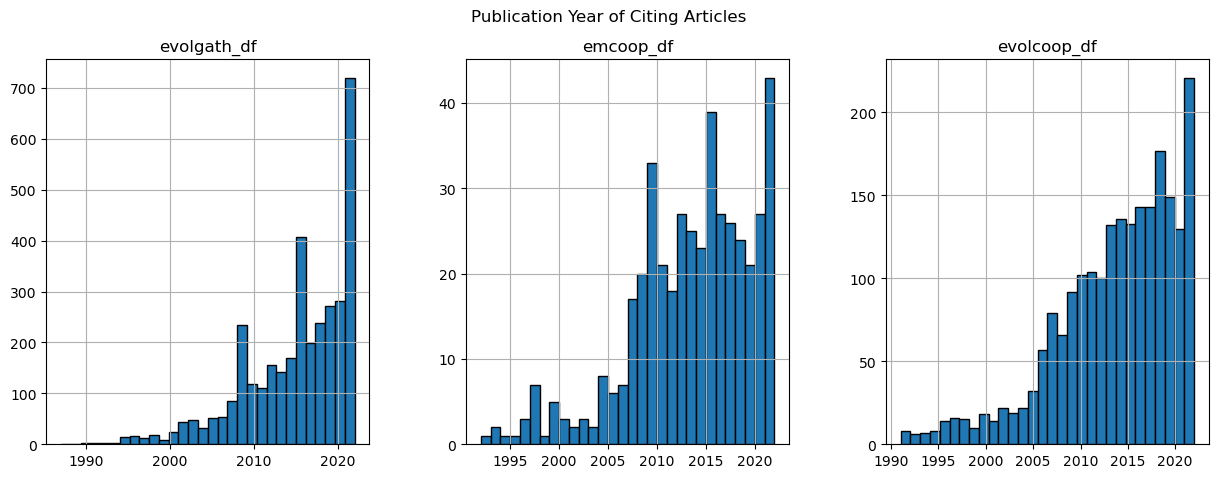

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

evolgath_df.hist(column='pubyear', bins=30, ax=axs[0], edgecolor='black')
axs[0].set_title('evolgath_df')

emcoop_df.hist(column='pubyear', bins=30, ax=axs[1], edgecolor='black')
axs[1].set_title('emcoop_df')

evolcoop_df.hist(column='pubyear', bins=30, ax=axs[2], edgecolor='black')
axs[2].set_title('evolcoop_df')

fig.suptitle('Publication Year of Citing Articles')

plt.show()

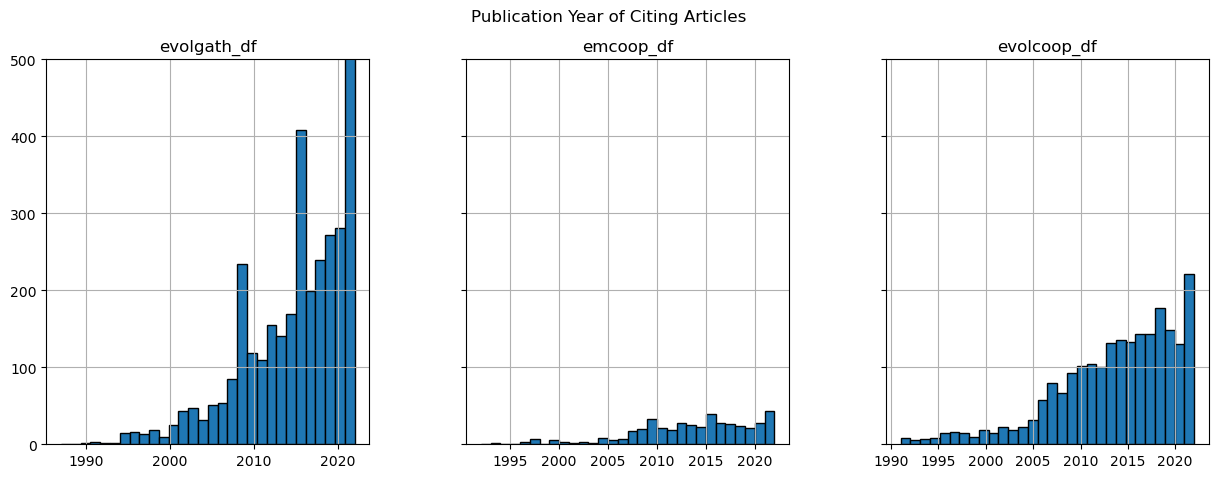

In [11]:
# With shared Y axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

evolgath_df.hist(column='pubyear', bins=30, ax=axs[0], edgecolor='black')
axs[0].set_title('evolgath_df')
axs[0].set_ylim([0, 500])

emcoop_df.hist(column='pubyear', bins=30, ax=axs[1], edgecolor='black')
axs[1].set_title('emcoop_df')
axs[1].set_ylim([0, 500])

evolcoop_df.hist(column='pubyear', bins=30, ax=axs[2], edgecolor='black')
axs[2].set_title('evolcoop_df')
axs[2].set_ylim([0, 500])

fig.suptitle('Publication Year of Citing Articles')

plt.show()

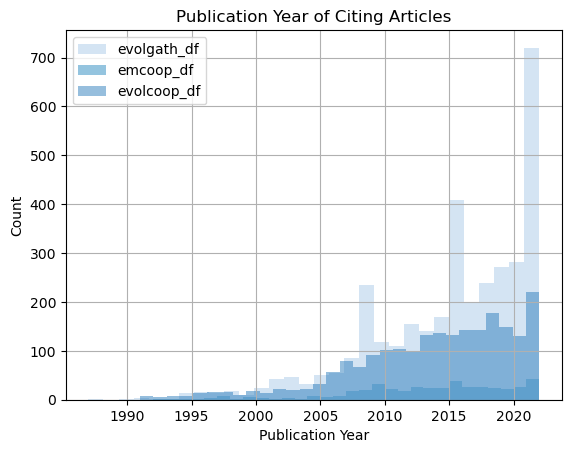

In [12]:
fig, ax = plt.subplots()

# Define the colormap for the histograms
import matplotlib.cm as cm
colormap = cm.Blues([0.2, 0.4, 0.7])

# Plot the histograms for each dataframe
evolgath_df.hist(column='pubyear', bins=30, color=colormap[0], ax=ax, alpha=0.9, label='evolgath_df')
emcoop_df.hist(column='pubyear', bins=30, color=colormap[1], ax=ax, label='emcoop_df')
evolcoop_df.hist(column='pubyear', bins=30, color=colormap[2], ax=ax, alpha=0.5, label='evolcoop_df')

ax.set_title('Publication Year of Citing Articles')
ax.set_xlabel('Publication Year')
ax.set_ylabel('Count')
ax.legend()

plt.show()

Overview item_type

In [37]:
evolgath_counts = evolgath_df['item_type'].value_counts()
emcoop_counts = emcoop_df['item_type'].value_counts()
evolcoop_counts = evolcoop_df['item_type'].value_counts()
coop_counts = coop_df['item_type'].value_counts()

# Create a dataframe with the counts for each item type
df_counts = pd.concat([evolgath_counts, emcoop_counts, evolcoop_counts, coop_counts], axis=1)
df_counts.columns = ['evolgath', 'emcoop', 'evolcoop', 'coop']

df_counts

,evolgath,emcoop,evolcoop,coop
{Article},2533.0,369.0,1847.0,2216.0
"{""Proceedings Paper""}",724.0,53.0,193.0,246.0
{Review},75.0,4.0,66.0,70.0
"{Article,""Proceedings Paper""}",55.0,15.0,26.0,41.0
"{Article,""Early Access""}",42.0,1.0,5.0,6.0
"{""Editorial Material""}",20.0,NaN,18.0,18.0
"{Review,""Book Chapter""}",3.0,NaN,NaN,NaN
"{Article,""Book Chapter""}",3.0,NaN,NaN,NaN
"{""Meeting Abstract""}",2.0,NaN,2.0,2.0
{Letter},2.0,1.0,NaN,1.0
